# Customer Segmentation - Toy Company
Elizabeth Dombowsky

Notes:
    - python package for sample size (determine population size)
    - learn more about the science of survey writing
        - survey writing: segmentation 

#### Storyline:
A toy company is interested in understanding what types of people are shopping for toys for their children. Using Customer segmentation based upon survey data will allow us to cluster on attitudes arround toys to understand what attitudes the population has around toy purchases and ownership

#### Methodology: 
- Generate Fake Survey Questions
- Generate Fake Data set
- Use Hierarchical Clustering to cluster on attitude questions
- Optimize Clusters
- Pull demographic info from clusters to understand the groups
- Visualize Clusters in Powerpoint 

# Generate Fake Dataset according to questions on fake survey

In [85]:
# Use faker package to create dataset
from faker import Faker

fake = Faker()

In [86]:
# Start by creating data set using random and putting into a DataFrame
import random
import pandas as pd

# Set a seed value for reproducibility
seed_value = 42
random.seed(seed_value)

# Generate numbers based on specified ranges
def generate_random_numbers(length, range_start, range_end):
    random_numbers = [random.randint(range_start, range_end) for _ in range(length)]
    return random_numbers

# Specify range and length
length_of_numbers = 350
start_range = 1
end_range = 5

# Generate random numbers
random_numbers = generate_random_numbers(length_of_numbers, start_range, end_range)
print(random_numbers)

# Convert list to DataFrame
fake_data = pd.DataFrame({'Column_Name': random_numbers})

# Display the DataFrame
print(fake_data)

[1, 1, 3, 2, 2, 2, 1, 5, 1, 5, 4, 1, 1, 1, 2, 2, 5, 5, 1, 5, 2, 5, 4, 2, 4, 5, 3, 1, 2, 4, 3, 3, 2, 2, 3, 1, 1, 4, 1, 3, 3, 5, 3, 1, 4, 5, 1, 4, 1, 5, 3, 5, 3, 5, 2, 1, 1, 2, 3, 1, 2, 1, 4, 3, 4, 3, 2, 3, 3, 2, 3, 1, 5, 2, 5, 2, 2, 4, 4, 3, 5, 2, 3, 1, 2, 1, 3, 4, 3, 1, 2, 5, 3, 2, 4, 4, 4, 2, 3, 2, 2, 5, 5, 3, 5, 4, 5, 4, 3, 2, 2, 5, 4, 1, 1, 1, 2, 2, 4, 5, 1, 4, 4, 5, 4, 5, 3, 5, 1, 1, 5, 3, 3, 1, 3, 4, 2, 4, 1, 3, 5, 2, 5, 1, 3, 5, 5, 2, 2, 3, 2, 5, 5, 1, 5, 3, 4, 1, 1, 3, 3, 2, 1, 2, 5, 1, 1, 4, 1, 5, 2, 2, 4, 5, 2, 3, 5, 5, 4, 2, 5, 2, 3, 4, 3, 4, 5, 4, 1, 2, 2, 1, 3, 1, 5, 5, 2, 5, 2, 1, 1, 1, 2, 1, 1, 3, 1, 5, 2, 3, 4, 2, 5, 2, 5, 5, 4, 2, 4, 4, 2, 1, 1, 4, 3, 4, 4, 4, 1, 1, 1, 4, 3, 1, 2, 2, 2, 5, 4, 2, 4, 2, 3, 4, 2, 1, 4, 5, 1, 1, 5, 1, 1, 2, 2, 4, 4, 4, 2, 4, 1, 2, 4, 1, 4, 3, 4, 3, 4, 5, 4, 2, 2, 3, 2, 1, 5, 5, 1, 3, 1, 1, 5, 4, 5, 5, 2, 1, 5, 1, 2, 1, 5, 1, 2, 4, 1, 5, 2, 5, 5, 1, 5, 1, 4, 5, 5, 5, 3, 3, 2, 3, 2, 3, 4, 2, 3, 4, 3, 1, 1, 4, 5, 5, 1, 1, 5, 2, 5, 3, 2, 3, 1, 

In [87]:
# create columns age, income, country, and rent or own
columns = ["age", "income", "country", "rent_own"]
for column in columns:
    random.seed(seed_value)  # Set the seed before generating each column
    fake_data[column] = generate_random_numbers(length_of_numbers, start_range, end_range)

# Display the DataFrame
print(fake_data)

     Column_Name  age  income  country  rent_own
0              1    1       1        1         1
1              1    1       1        1         1
2              3    3       3        3         3
3              2    2       2        2         2
4              2    2       2        2         2
..           ...  ...     ...      ...       ...
345            1    1       1        1         1
346            2    2       2        2         2
347            3    3       3        3         3
348            1    1       1        1         1
349            1    1       1        1         1

[350 rows x 5 columns]


In [88]:
# rename column to family_sizes
fake_data.rename(columns={0:"family_sizes"}, inplace = True)

In [90]:
# Create column income between 25k and 250k
np.random.seed(seed_value)
fake_data['income'] = np.random.randint(25000, 250000, size=len(fake_data))

In [91]:
# Create column ag, values between 21 and 100
np.random.seed(seed_value)
fake_data['age'] = np.random.randint(21, 70, size=len(fake_data))

In [92]:
# Create column Country
from faker import Faker
np.random.seed(seed_value)
fake_data['country'] = [fake.country_code() for _ in range(len(fake_data))]

In [158]:
# Create column number of Children in the Home under 18
np.random.seed(seed_value)
fake_data['Children'] = np.random.randint(1, 7, size=len(fake_data))

In [159]:
#Rent/own
# List of possible words
word_choices = ['rent','own']
np.random.seed(seed_value)
# Add a new column 'RandomChosenWord' with randomly chosen words
fake_data['rent_own'] = [random.choice(word_choices) for _ in range(len(fake_data))]

# Attitude Questions

All questions ordinal ("Strong agree", "Agree", "netural", "Disagree", "Strongly Disagree" (1-4

1. I feel that lots of toys are good for children
2. I feel that Allowing my child to have screen time when i am overwhelmed is okay
3. I feel stressed when there are lots of toys in my house
4. I feel that toys are a big part of childhood
5. I feel that Toys need be easy to clean
6. I feel that televison and screen time is bad for my child
7. I feel that my house has too many toys
8. Toys should have parents feelings in mind
9. I perfer my house to all match my personal aesthetic
10. Toys can be too colorful
11. Toys should be easily stored

In [161]:
# add attitude questions to columns and add to dataframe
columns = [["lots_of_toys_good", " Screen_time_is_good","Stressed_lots_of_toys","Toys_impt_childhood","toys_clean",
           "screen_time_bad","house_man_toys","parents_feelings_important","decor_match","Too_colorful",
           "easy_storage"]]
for column in columns:
    np.random.seed(seed_value)
    fake_data[column] = None

In [163]:
# add random numbers between 1-4 to attitude columns
np.random.seed(seed_value)
fake_data['lots_of_toys_good'] = np.random.randint(1,4, size=len(fake_data))
fake_data[' Screen_time_is_good'] = np.random.randint(1,4, size=len(fake_data))
fake_data['Stressed_lots_of_toys'] = np.random.randint(1,4, size=len(fake_data))
fake_data['Toys_impt_childhood'] = np.random.randint(1,4, size=len(fake_data))
fake_data['toys_clean'] = np.random.randint(1,4, size=len(fake_data))
fake_data['screen_time_bad'] = np.random.randint(1,4, size=len(fake_data))
fake_data['house_man_toys'] = np.random.randint(1,4, size=len(fake_data))
fake_data['parents_feelings_important'] = np.random.randint(1,4, size=len(fake_data))
fake_data['decor_match'] = np.random.randint(1,4, size=len(fake_data))
fake_data['Too_colorful'] = np.random.randint(1,4, size=len(fake_data))
fake_data['easy_storage'] = np.random.randint(1,4, size=len(fake_data))

# Subscription Data

#1. Which movie/Tv service do you subscribe to?

    1 = Apple Tv
    2 = Disney +
    3 = Amazon Prime
    4 = Hulu
#2. Which music service do you subscribe to?

    1 = Apple Music
    2 = Youtube Music
    3 = Spotify
    4 = iHeart Radio
    5 = Pandora
#3.Which Food service do you subscribe to?

    1 = GrubHub
    2 = Doordash
    3 = Instacart
    4 = Ubereats
    
#4.Which beauty service do you subscribe to?

    1 = Sephora
    2 = Ulta
    3 = Ipsy
    4 = BoxyCharm
#5.Which pet service do you subscribe to?

    1 = Amazon Prime
    2 = Chewy
    3 = BarkBox
    4 = Petsgameday

In [219]:
#add columns movie/tv, music, food, beauty, and pet
columns = [["movie/tv","music","food","beauty","pet"]]
for column in columns:
    np.random.seed(seed_value)
    fake_data[column] = None

In [167]:
# add random numbers between 1-4 or 1-5 to subscription columns
fake_data['movie/tv'] = np.random.randint(1,4, size=len(fake_data))
fake_data['music'] = np.random.randint(1,5, size=len(fake_data))
fake_data['food'] = np.random.randint(1,4, size=len(fake_data))
fake_data['beauty'] = np.random.randint(1,4, size=len(fake_data))
fake_data['pet'] = np.random.randint(1,4, size=len(fake_data))

# Hierarchical Clustering

Notes:
- choose a distance metric fit for ordinal data:
     - Found: Spearman Rank Correlation Distance or Kendall's Tau Distance:


In [220]:
#Label Encode columns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the specified column
fake_data["rent_own"] = label_encoder.fit_transform(fake_data["rent_own"])
fake_data["country"] = label_encoder.fit_transform(fake_data["country"])

In [171]:
#agglomerative clustering
## Optimized clusters by changing the n of clusters and viewing output
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(fake_data)

AgglomerativeClustering(n_clusters=3)

In [173]:
# Create label variable for the clusters
fake_data['label'] = agg_clustering.labels_
fake_data.head()

,Column_Name,age,income,country,rent_own,lots_of_toys_good,Screen_time_is_good,Stressed_lots_of_toys,Toys_impt_childhood,toys_clean,...,decor_match,Too_colorful,easy_storage,movie/tv,music,food,beauty,pet,label,Children
0,1,59,146958,118,1,3,3,3,2,1,...,3,2,2,3,3,2,2,2,0,4
1,1,49,171867,38,1,1,1,3,1,1,...,1,3,3,1,4,2,1,2,0,5
2,3,35,156932,36,0,3,3,1,2,2,...,2,3,3,3,1,3,1,3,0,3
3,2,63,128694,12,1,3,1,1,1,3,...,1,1,1,3,4,2,1,2,0,5
4,2,28,144879,27,0,1,1,2,3,1,...,1,3,3,1,3,3,1,2,0,5


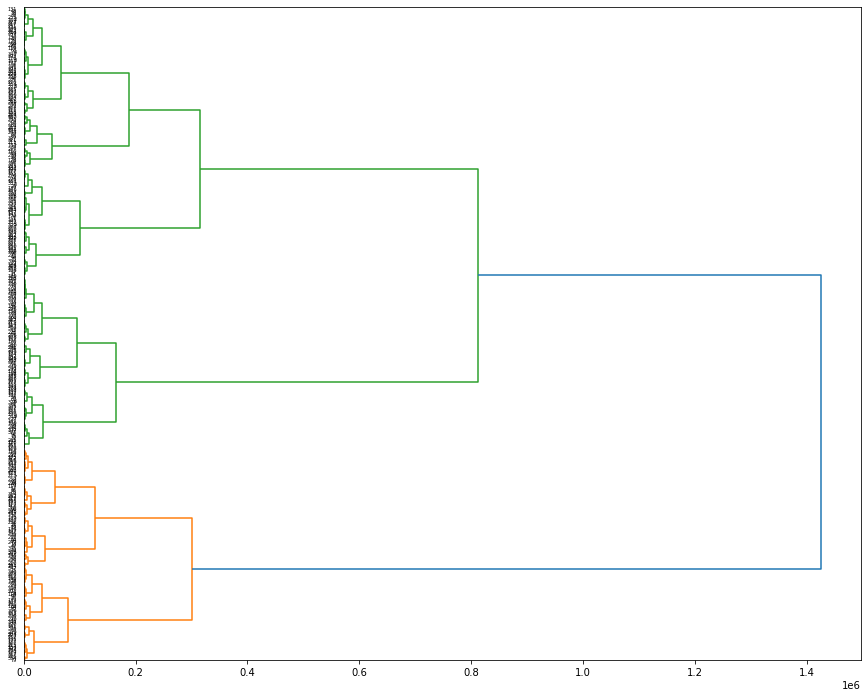

In [174]:
# Visualize clusters using dendrogram from Scipy
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(fake_data, method='ward')
import matplotlib.pyplot as plt

#plot
plt.figure(figsize=(15, 12))

dendrogram(
    Z,
    orientation='right',
    labels=fake_data.index.tolist(),
    show_leaf_counts=False
)

plt.show()

# Extract Mean of Clusters and Columns to Understand Columns

In [175]:
# view mean of columns
fake_data.groupby(['label']).mean()

,Column_Name,age,income,country,rent_own,lots_of_toys_good,Screen_time_is_good,Stressed_lots_of_toys,Toys_impt_childhood,toys_clean,...,parents_feelings_important,decor_match,Too_colorful,easy_storage,movie/tv,music,food,beauty,pet,Children
label,,,,,,,,,,,,,,,,,,,,,
0,2.861111,44.972222,148190.458333,71.819444,0.395833,2.006944,1.895833,1.986111,2.055556,1.958333,...,1.909722,1.944444,1.937500,2.041667,2.006944,2.548611,1.979167,2.041667,1.993056,3.479167
1,3.000000,43.070796,62912.353982,71.185841,0.495575,1.991150,1.955752,2.000000,1.973451,1.920354,...,1.973451,2.035398,2.035398,1.938053,1.991150,2.442478,1.991150,1.973451,1.991150,3.398230
2,2.870968,47.849462,224541.000000,78.978495,0.516129,2.000000,1.935484,1.978495,2.010753,1.946237,...,1.946237,2.000000,1.924731,2.182796,2.000000,2.440860,1.903226,1.967742,2.000000,3.462366


# Extract Data by viewing most frequent Values

In [203]:
# Create df for each cluster
df0 = fake_data[fake_data['label'] == 0]
df1 = fake_data[fake_data['label'] == 1]
df2 = fake_data[fake_data['label'] == 2]

#### Age

In [178]:
#age
df0["age"].value_counts().head(3)

48    6
55    6
53    5
Name: age, dtype: int64

In [179]:
df1["age"].value_counts().head(3)

28    5
22    5
64    5
Name: age, dtype: int64

In [180]:
df2["age"].value_counts().head(3)

53    6
68    5
52    4
Name: age, dtype: int64

### Children

In [205]:
df0["Children"].value_counts().head(3)

4    30
3    28
1    27
Name: Children, dtype: int64

In [206]:
df1["Children"].value_counts().head(3)

1    26
4    23
6    20
Name: Children, dtype: int64

In [207]:
df2["Children"].value_counts().head(3)

3    18
4    18
2    16
Name: Children, dtype: int64

##### income

In [184]:
df0["income"].value_counts().head(3)

146958    1
171867    1
144101    1
Name: income, dtype: int64

In [185]:
df1["income"].value_counts().head(3)

79886    1
49538    1
51736    1
Name: income, dtype: int64

In [186]:
df2["income"].value_counts().head(3)

232892    1
199013    1
245546    1
Name: income, dtype: int64

##### rent/own
rent=1
own = 0

In [187]:
df0["rent_own"].value_counts().head(3)

0    87
1    57
Name: rent_own, dtype: int64

In [188]:
df1["rent_own"].value_counts().head(3)

0    57
1    56
Name: rent_own, dtype: int64

In [189]:
df2["rent_own"].value_counts().head(3)

1    48
0    45
Name: rent_own, dtype: int64

# Evaluate Clusters 

In [191]:
# Create datafame from each cluster in Attitudes
adf= fake_data[["lots_of_toys_good", " Screen_time_is_good","Stressed_lots_of_toys","Toys_impt_childhood","toys_clean",
           "screen_time_bad","house_man_toys","parents_feelings_important","decor_match","Too_colorful",
           "easy_storage","label"]]

In [193]:
# Create df for each cluster in attitudes
df0 = adf[adf['label'] == 0]
df1 = adf[adf['label'] == 1]
df2 = adf[adf['label'] == 2]

In [194]:
# view most frequent values for dataframe 
df0.mode().iloc[0]

lots_of_toys_good             3
 Screen_time_is_good          1
Stressed_lots_of_toys         1
Toys_impt_childhood           3
toys_clean                    1
screen_time_bad               3
house_man_toys                2
parents_feelings_important    1
decor_match                   1
Too_colorful                  1
easy_storage                  3
label                         0
Name: 0, dtype: int64

In [195]:
# view most frequent values for dataframe 
df1.mode().iloc[0]

lots_of_toys_good             1.0
 Screen_time_is_good          2.0
Stressed_lots_of_toys         2.0
Toys_impt_childhood           1.0
toys_clean                    1.0
screen_time_bad               2.0
house_man_toys                1.0
parents_feelings_important    1.0
decor_match                   3.0
Too_colorful                  2.0
easy_storage                  1.0
label                         1.0
Name: 0, dtype: float64

In [196]:
# view most frequent values for dataframe 
df2.mode().iloc[0]

lots_of_toys_good             1.0
 Screen_time_is_good          1.0
Stressed_lots_of_toys         1.0
Toys_impt_childhood           2.0
toys_clean                    1.0
screen_time_bad               1.0
house_man_toys                1.0
parents_feelings_important    2.0
decor_match                   2.0
Too_colorful                  1.0
easy_storage                  3.0
label                         2.0
Name: 0, dtype: float64

#### Subscriptions

In [211]:
# Create datafame of subscription questions
sdf= fake_data[["movie/tv","music","food","beauty","pet", "label"]]

In [213]:
# Create datafame from each cluster in subscription
sf0 = sdf[adf['label'] == 0]
sf1 = sdf[adf['label'] == 1]
sf2 = sdf[adf['label'] == 2]

In [215]:
# view most frequent values for dataframe 
sf0.mode().iloc[0]

movie/tv    2
music       4
food        2
beauty      2
pet         3
label       0
Name: 0, dtype: int64

In [216]:
# view most frequent values for dataframe 
sf1.mode().iloc[0]

movie/tv    3.0
music       1.0
food        2.0
beauty      1.0
pet         1.0
label       1.0
Name: 0, dtype: float64

In [217]:
# view most frequent values for dataframe 
sf2.mode().iloc[0]

movie/tv    1
music       2
food        1
beauty      1
pet         2
label       2
Name: 0, dtype: int64